In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [10]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [11]:
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor*np.random.randn(*x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor*np.random.randn(*x_test.shape), 0., 1.)

In [12]:
inp = Input((28,28,1))
x = Flatten()(inp)
x = Dense(128,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(32,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(128,activation='relu')(x)
x = Dense(784,activation='sigmoid')(x)
out = Reshape((28,28,1))(x)
model = Model(inp,out)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
model.fit(x_train_noisy, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3294 - val_loss: 0.2038
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1944 - val_loss: 0.1726
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1696 - val_loss: 0.1601
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1591 - val_loss: 0.1533
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1524 - val_loss: 0.1479


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


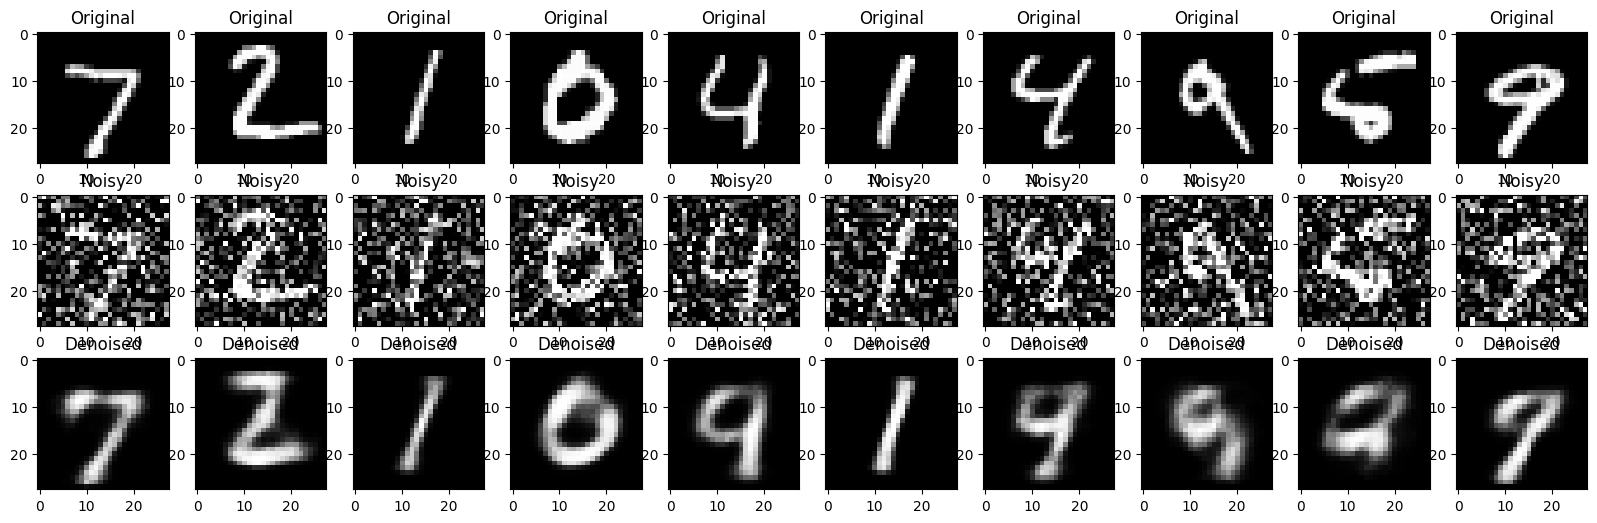

In [14]:
denoised = model.predict(x_test_noisy)
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(3,10,i+1)
    plt.imshow(x_test[i].squeeze(),cmap='gray')
    plt.title('Original')
    plt.subplot(3,10,10+i+1)
    plt.imshow(x_test_noisy[i].squeeze(),cmap='gray')
    plt.title('Noisy')
    plt.subplot(3,10,20+i+1)
    plt.imshow(denoised[i].squeeze(),cmap='gray')
    plt.title('Denoised')
plt.show()